In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
real_text = "Прачка Палашка, толстая и рябая девка, и кривая коровница Акулька как то согласились в одно время кинуться матушке в ноги, винясь в преступной слабости и с плачем жалуясь на мусье, обольстившего их неопытность. Матушка шутить этим не любила и пожаловалась батюшке. У него расправа была коротка. Он тотчас потребовал каналью француза. Доложили, что мусье давал мне свой урок. Батюшка пошел в мою комнату. В это время Бопре спал на кровати сном невинности. Я был занят делом. Надобно знать, что для меня выписана была из Москвы географическая карта. Она висела на стене безо всякого употребления и давно соблазняла меня шириною и добротою бумаги. Я решился сделать из нее змей и, пользуясь сном Бопре, принялся за работу. Батюшка вошел в то самое время, как я прилаживал мочальный хвост к Мысу Доброй Надежды. Увидя мои упражнения в географии, батюшка дернул меня за ухо, потом подбежал к Бопре, разбудил его очень неосторожно и стал осыпать укоризнами. Бопре в смятении хотел было привстать и не мог: несчастный француз был мертво пьян. Семь бед, один ответ. Батюшка за ворот приподнял его с кровати, вытолкал из дверей и в тот же день прогнал со двора, к неописанной радости Савельича. Тем и кончилось мое воспитание."

In [3]:
def norm(text):
    text = text.lower()
    text = text.replace(" ", "прб").lower().replace(",", "зпт").replace(".", "тчк")
    return text

In [4]:
def create_df(text):
    real_text_n = norm(real_text)
    sim_real_text = list(real_text_n)
    alf = list(sorted("абвгдежзийклмнопрстуфхцчшщъыьэюя"))
    df = pd.DataFrame({
        'sim': alf,
        'kol': [sim_real_text.count(ch) for ch in alf]
    })
    return df


In [5]:
def all(text):
    text_n = norm(text)
    df = create_df(text_n)
    plt.figure(figsize=(12,4))
    sns.barplot(data=df, x="sim", y="kol")
    plt.tight_layout()

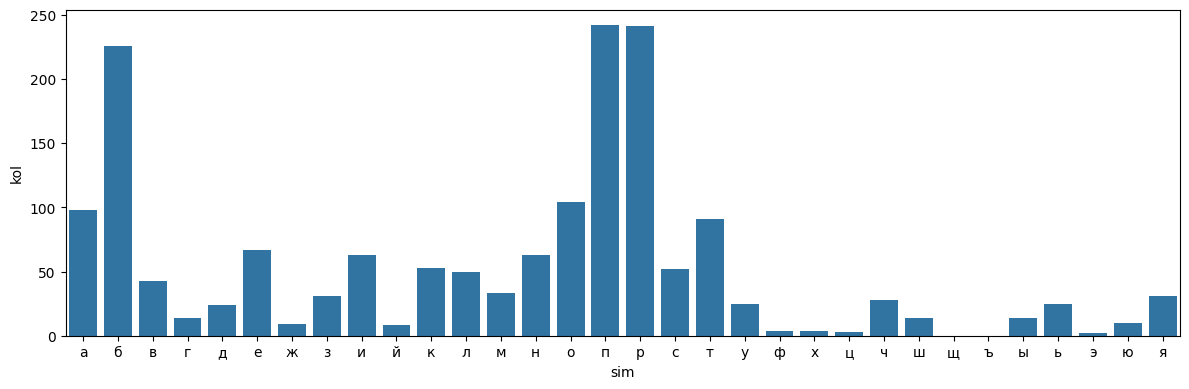

In [8]:
all(real_text)

In [7]:
alf = "абвгдежзийклмнопрстуфхцчшщъыьэюя"

my_str = "не все те поваразпт что с длинными ножами ходяттчк"

res = []
i = 0
for sim in my_str:
    if sim != " ":
        index = alf.index(sim)
        ind_ = 31 - index
        res.append(alf[ind_])
string = ''.join(res)

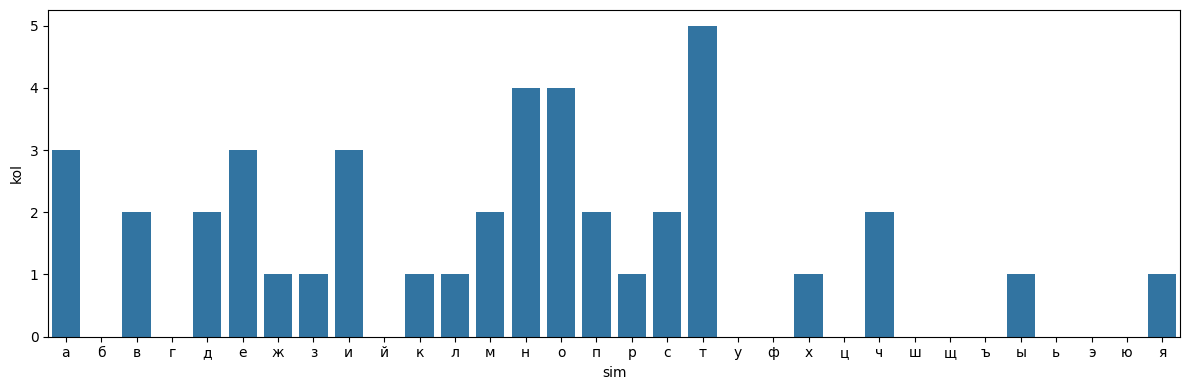

In [8]:
all(string)

In [9]:
def mass_t(t = 9, a = 5, c = 3, m = 32):
    T = []
    for i in range(32):
        t = (t * 5 + c) % m
        T.append(t)
    return T

In [10]:
def encode(text):
    text_n = norm(text)
    alf = list(sorted("абвгдежзийклмнопрстуфхцчшщъыьэюя"))
    t = mass_t()
    res = []
    for i, sim in enumerate(text_n):
        ind = (alf.index(sim) + 1) % 32
        res.append(alf[(ind + t[i % 32] - 1) % 32])
    return res

In [11]:
def decode(text, a, c, t):
    text_n = norm(text)
    alf = list(sorted("абвгдежзийклмнопрстуфхцчшщъыьэюя"))
    t = mass_t(a=a, c=c, t=t)
    res = []
    for sim in text:
        print(sim, (alf.index(sim) + 1) % 32)
    for i, sim in enumerate(text_n):
        ind = (alf.index(sim) + 1) % 32
        res.append(alf[(ind - t[i % 32] - 1) % 32])
        print(sim, alf[(ind - t[i % 32] - 1) % 32])
    res_ = ''.join(res)
    return res_